In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("D:/VisualStudioPython/Infosys Springboard/Human Stress Detection during Sleep/Stress.csv")

In [3]:
df.shape

(630, 9)

In [4]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [5]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [6]:
col_dictionary = {
    "sr": "Snoring Rate",
    "rr": "Respiratory Rate",
    "t": "Body Temperature",
    "lm": "Limb Movement",
    "bo": "Blood Oxygen Level",
    "rem": "Eye Movement",
    "sr.1": "Sleep Hours",
    "hr": "Heart Rate",
    "sl": "Stress Level",
}

In [7]:
# Rename the columns using the dictionary
df.rename(columns=col_dictionary, inplace=True)

In [8]:
df.head()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen Level,Eye Movement,Sleep Hours,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [9]:
col_to_keep = ["Heart Rate","Respiratory Rate","Limb Movement","Sleeping Hours","Blood Oxygen Level","Snoring Rate","Stress Level"]

In [9]:
df["Stress Level"].unique()

array([3, 1, 0, 2, 4])

In [13]:
df['Stress Level'].value_counts()

Stress Level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

In [14]:
df['Stress Level'] = df['Stress Level'].replace([1, 2, 3, 4], 1)

In [15]:
df['Stress Level'].value_counts()

Stress Level
1    504
0    126
Name: count, dtype: int64

In [41]:
df['Stress Level'].value_counts(normalize=True) * 100

Stress Level
1    80.0
0    20.0
Name: proportion, dtype: float64

In [16]:
df.head()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen Level,Eye Movement,Sleep Hours,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,1
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,1
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,1
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Snoring Rate        630 non-null    float64
 1   Respiratory Rate    630 non-null    float64
 2   Body Temperature    630 non-null    float64
 3   Limb Movement       630 non-null    float64
 4   Blood Oxygen Level  630 non-null    float64
 5   Eye Movement        630 non-null    float64
 6   Sleep Hours         630 non-null    float64
 7   Heart Rate          630 non-null    float64
 8   Stress Level        630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [18]:
df.isnull().sum()

Snoring Rate          0
Respiratory Rate      0
Body Temperature      0
Limb Movement         0
Blood Oxygen Level    0
Eye Movement          0
Sleep Hours           0
Heart Rate            0
Stress Level          0
dtype: int64

## Histogram

In [28]:
# The histogram displays the number of observations (frequency) for different intervals (bins) of the data. 
# Each bar represents the count of data points that fall within that range.

# KDE : It smooths out the distribution by placing a continuous curve over the data,
# giving you an idea of the underlying structure or shape of the distribution.

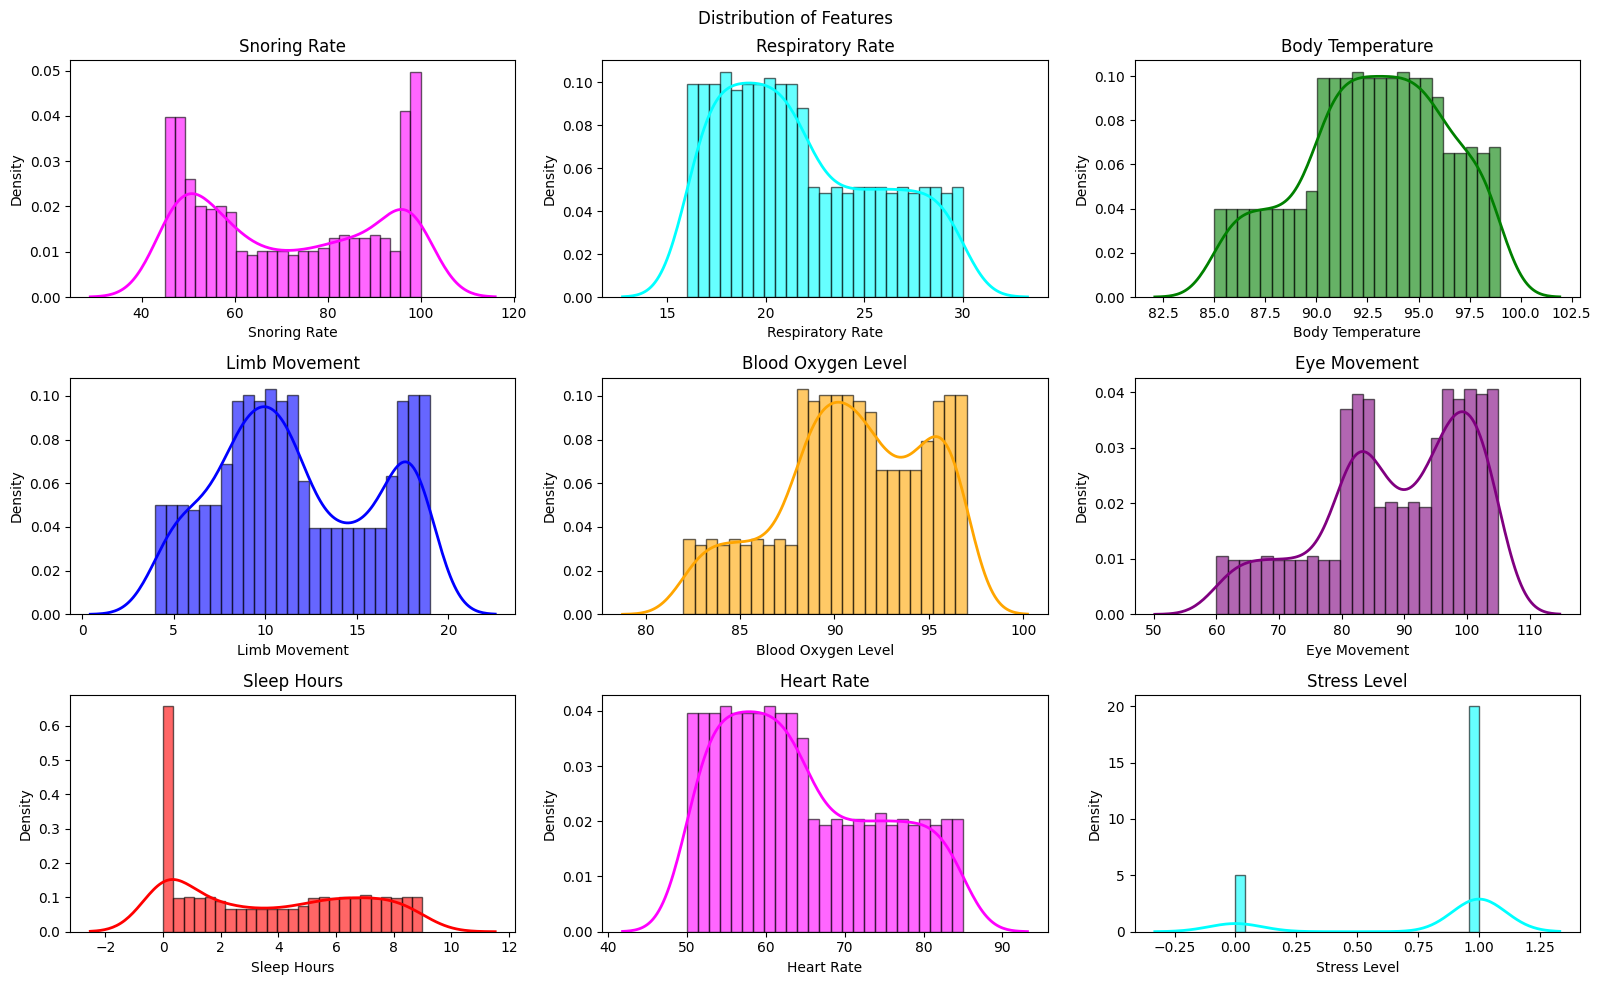

In [27]:
import seaborn as sns

colors = ['magenta', 'cyan', 'green', 'blue', 'orange', 'purple', 'red']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    # Plot histogram
    axes[i].hist(df[column], bins=25, color=colors[i % len(colors)], edgecolor='black', alpha=0.6, density=True)
    
    # Plot KDE on the same axes
    sns.kdeplot(df[column], ax=axes[i], color=colors[i % len(colors)], linewidth=2)
    
    axes[i].set_title(f'{column}')

plt.suptitle('Distribution of Features')
plt.tight_layout()
plt.show()


## Scatter Plot

In [29]:
# shows the relationship between two numerical variables. 
# Each point on the scatter plot represents an observation from your dataset, 
# with its position determined by the values of two variables — one on the x-axis and the other on the y-axis.

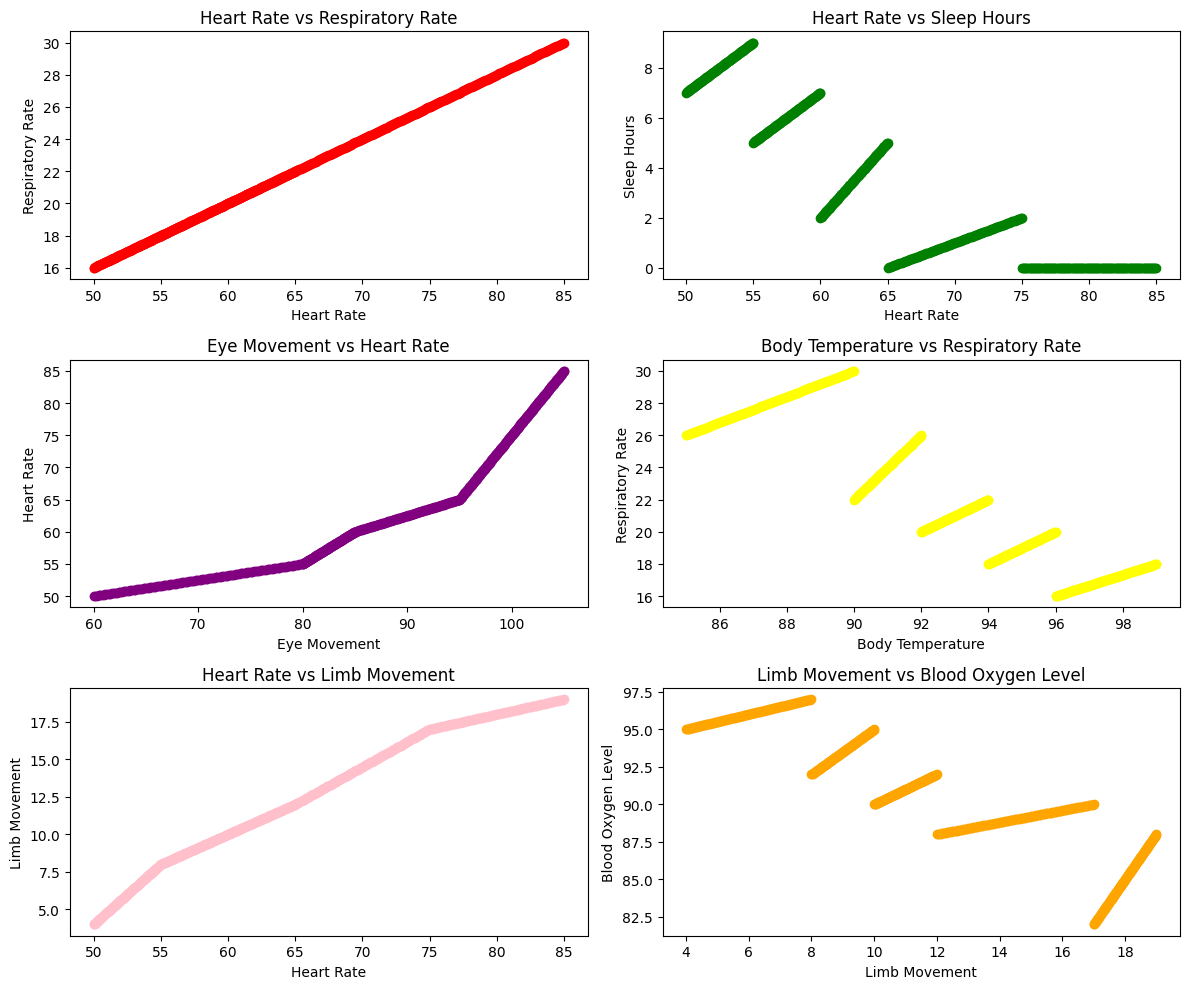

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) 


axes[0, 0].scatter(df['Heart Rate'], df['Respiratory Rate'], alpha=1,color='red')
axes[0, 0].set_xlabel('Heart Rate')
axes[0, 0].set_ylabel('Respiratory Rate')
axes[0, 0].set_title('Heart Rate vs Respiratory Rate')


axes[0, 1].scatter(df['Heart Rate'], df['Sleep Hours'], alpha=1,color='green')
axes[0, 1].set_xlabel('Heart Rate')
axes[0, 1].set_ylabel('Sleep Hours')
axes[0, 1].set_title('Heart Rate vs Sleep Hours')


axes[1, 0].scatter(df['Eye Movement'], df['Heart Rate'], alpha=1,color='purple')
axes[1, 0].set_xlabel('Eye Movement')
axes[1, 0].set_ylabel('Heart Rate')
axes[1, 0].set_title('Eye Movement vs Heart Rate')


axes[1, 1].scatter(df['Body Temperature'], df['Respiratory Rate'], alpha=1,color='yellow')
axes[1, 1].set_xlabel('Body Temperature')
axes[1, 1].set_ylabel('Respiratory Rate')
axes[1, 1].set_title('Body Temperature vs Respiratory Rate')


axes[2, 0].scatter(df['Heart Rate'], df['Limb Movement'], alpha=1,color='pink')
axes[2, 0].set_xlabel('Heart Rate')
axes[2, 0].set_ylabel('Limb Movement')
axes[2, 0].set_title('Heart Rate vs Limb Movement')


axes[2, 1].scatter(df['Limb Movement'], df['Blood Oxygen Level'], alpha=1,color='orange')
axes[2, 1].set_xlabel('Limb Movement')
axes[2, 1].set_ylabel('Blood Oxygen Level')
axes[2, 1].set_title('Limb Movement vs Blood Oxygen Level')

plt.tight_layout()

plt.show()

## Bar Plot

In [32]:
# Shows the average vaulue of a column for each category of a target column.

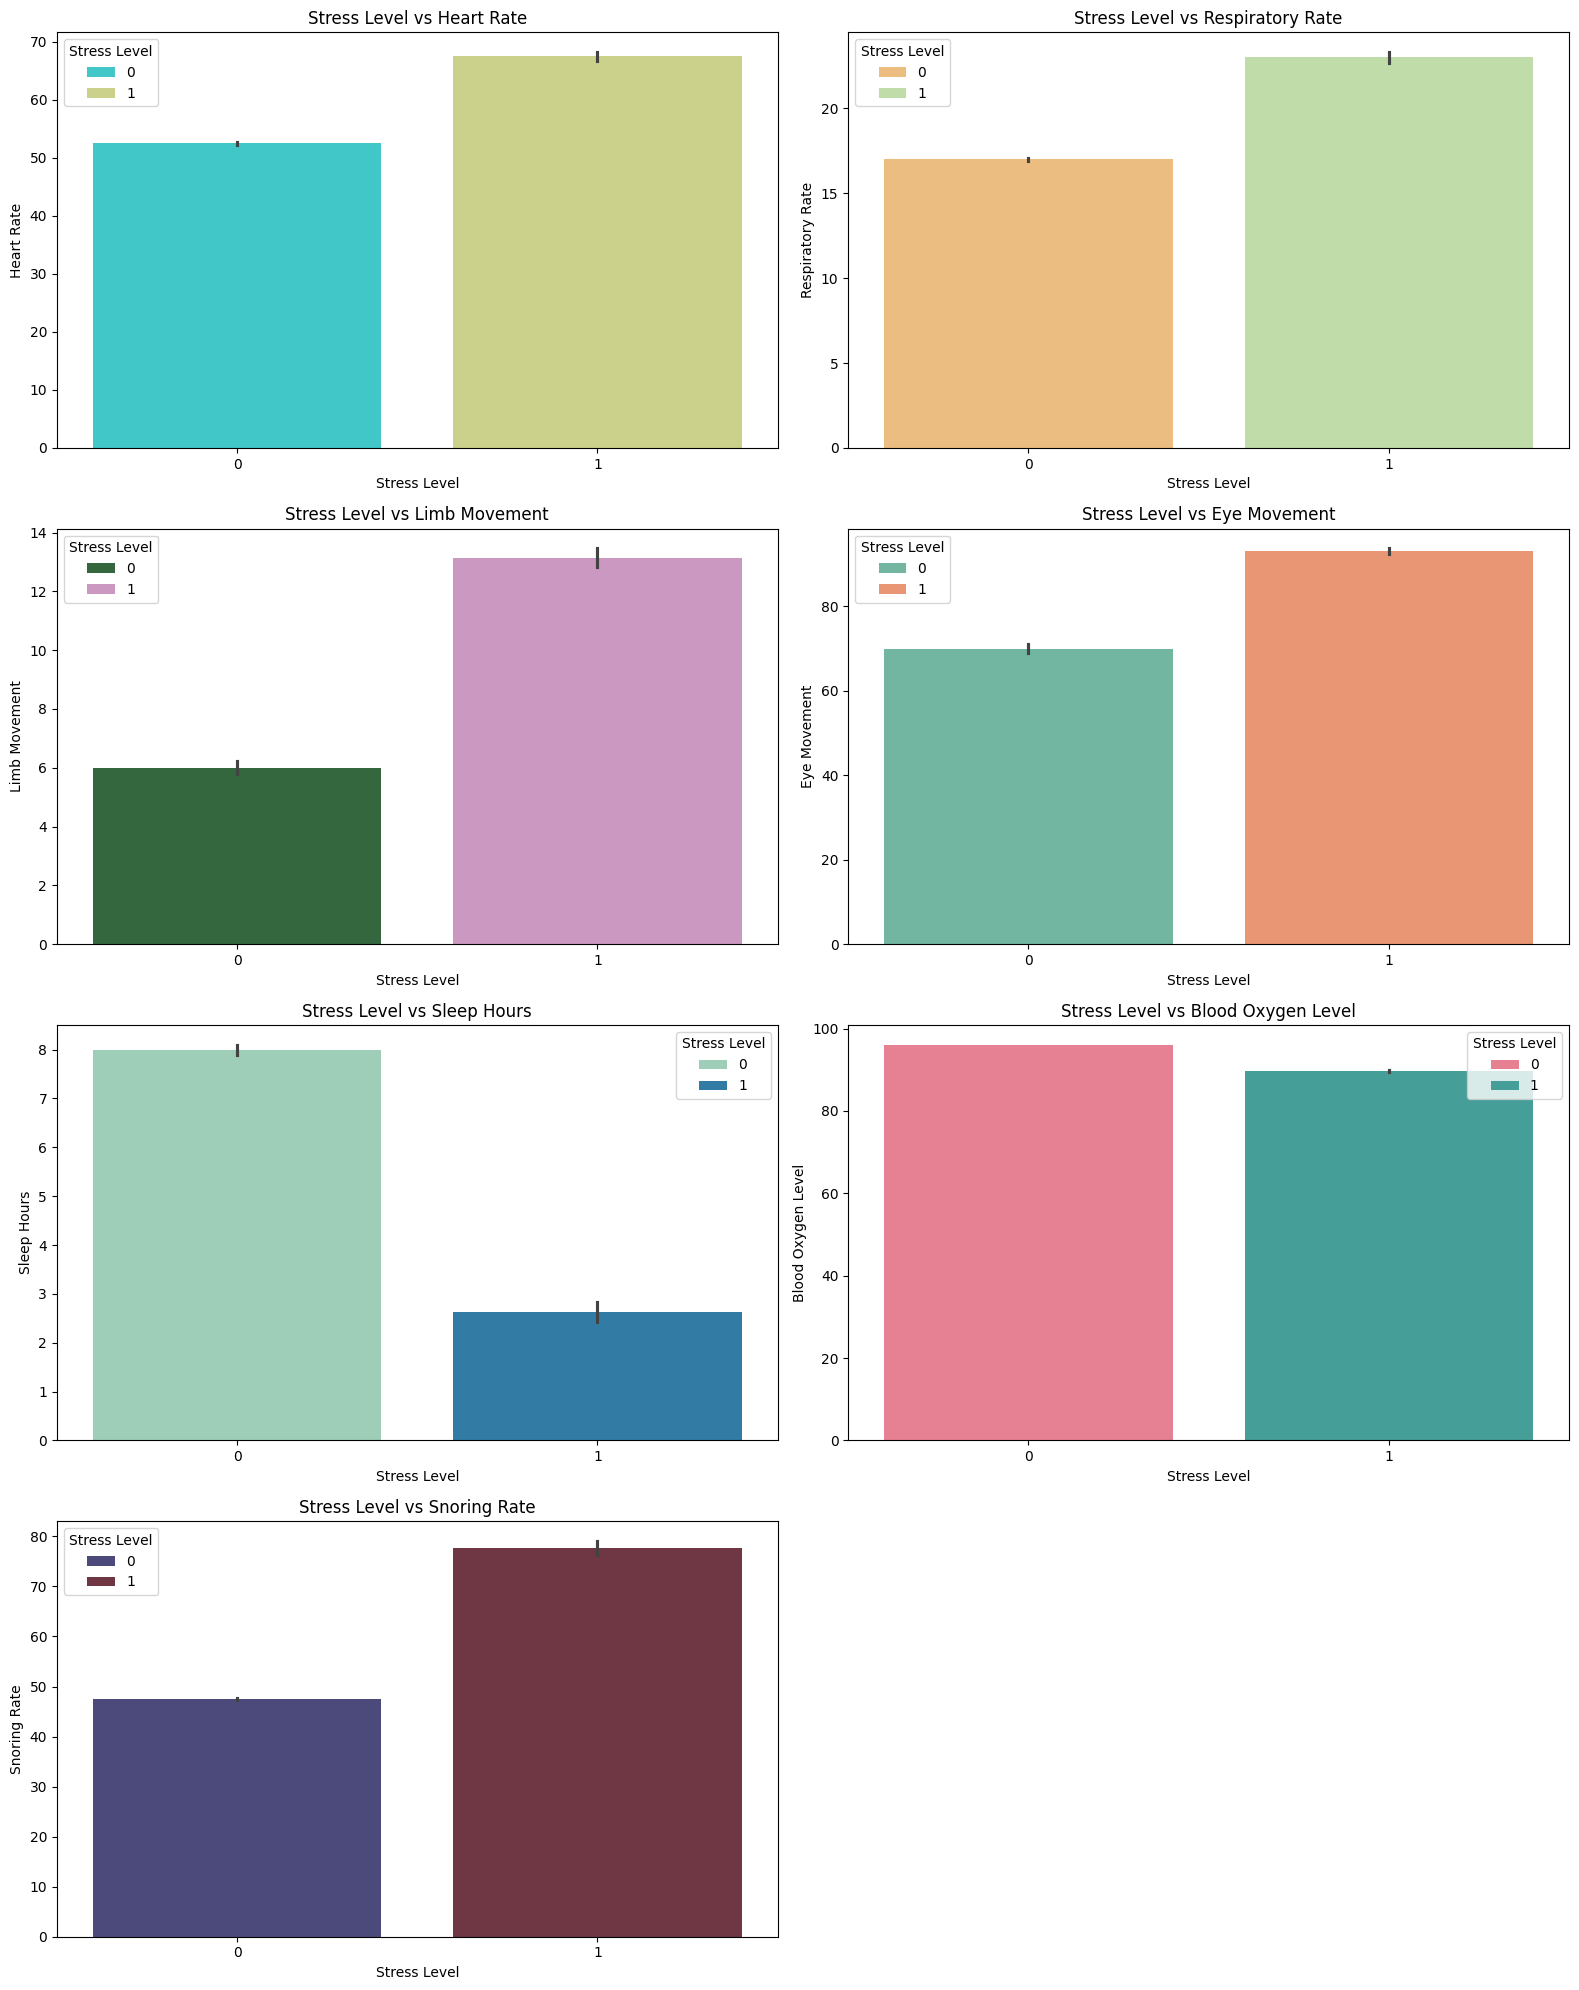

In [34]:
columns = ['Heart Rate', 'Respiratory Rate', 'Limb Movement','Eye Movement',
           'Sleep Hours', 'Blood Oxygen Level', 'Snoring Rate']



palettes = ['rainbow', 'Spectral', 'cubehelix', 'Set2', 'YlGnBu', 'husl', 'icefire']


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))  
axes = axes.flatten()


for i, column in enumerate(columns):
    sns.barplot(x='Stress Level', y=column, ax=axes[i], hue='Stress Level', data=df, palette=palettes[i], legend=True)
    axes[i].set_title(f'Stress Level vs {column}')
    axes[i].set_xlabel('Stress Level')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.delaxes(axes[-1]) 
plt.show()


In [42]:
stress_level_counts = df['Stress Level'].value_counts()
stress_level_counts

Stress Level
1    504
0    126
Name: count, dtype: int64

## Pie Chart

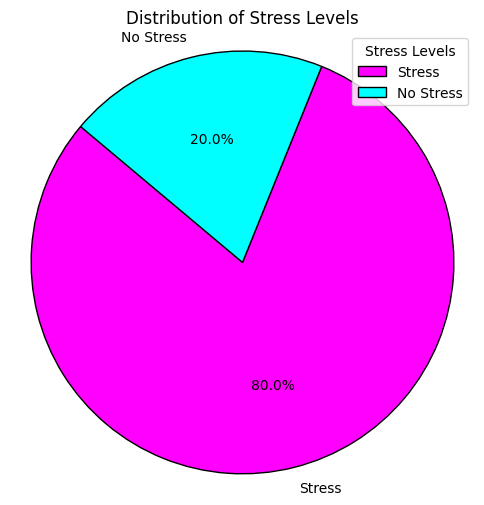

In [45]:
stress_level_counts = df['Stress Level'].value_counts()

labels = ['Stress', 'No Stress']

colors = ['magenta','aqua'] 

plt.figure(figsize=(6, 6))
plt.pie(stress_level_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, 
        wedgeprops=dict(edgecolor='black')) 
plt.legend( labels, title="Stress Levels", loc="best", fontsize=10)
plt.title('Distribution of Stress Levels')
plt.axis('equal')  
plt.show()


In [46]:
df['Sleep Hours'].value_counts()

Sleep Hours
0.000    127
5.000      2
7.000      2
2.000      2
8.440      1
        ... 
4.352      1
1.712      1
1.008      1
6.696      1
4.016      1
Name: count, Length: 501, dtype: int64

## HeatMap

In [49]:
# A correlation heatmap shows the correlation coefficients between multiple variables in a dataset. 
# The correlation values range from -1 to 1.

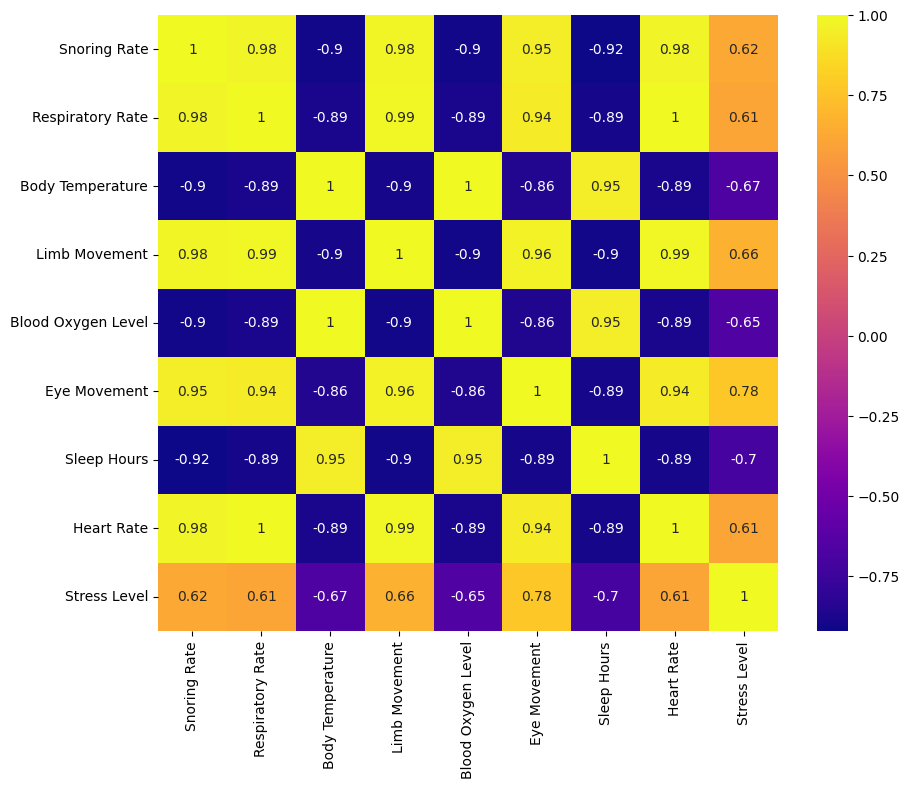

In [48]:
correlation = df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

In [50]:
df.to_csv('cleaned_data.csv', index=False)